In [1]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os
import pandas.io.data as web
import datetime
from pandas import read_csv,Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import sqlite3

tf.set_random_seed(777)  # reproducibility
np.set_printoptions(threshold=np.inf)

//anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
class Indicator:
    def __init__(self):

        try:
            con = sqlite3.connect("../01_KOSPI.db")
            cursor = con.cursor()
            cursor.execute("SELECT * FROM kospi_data")
            rows = cursor.fetchall()

            self.k_date, self.high_price, self.low_price, self.open_price, self.close_price, self.volume, self.turnover, self.sign, self.diff, self.foreigner_net, self.organ_net = [], [], [], [], [], [], [], [], [], [], []

            for row in rows:
                self.k_date.append(datetime.datetime.strptime("%s"%str(row[0]), "%Y%m%d").date())
                self.high_price.append(str(row[1]))
                self.low_price.append(str(row[2]))
                self.open_price.append(str(row[3]))
                self.close_price.append(str(row[4]))
                self.volume.append(str(row[5]))
                self.turnover.append(str(row[6]))
                self.sign.append(str(row[7]))
                self.diff.append(str(row[8]))
                self.foreigner_net.append(str(row[9]))
                self.organ_net.append(str(row[10]))

            self.k_date.reverse()
            self.high_price.reverse()
            self.low_price.reverse()
            self.open_price.reverse()
            self.close_price.reverse()
            self.volume.reverse()
            self.turnover.reverse()
            self.sign.reverse()
            self.diff.reverse()
            self.foreigner_net.reverse()
            self.organ_net.reverse()


            self.k_date = np.array(self.k_date)
            self.high_price = np.array(self.high_price)
            self.low_price = np.array(self.low_price)
            self.open_price = np.array(self.open_price)
            self.close_price = np.array(self.close_price)
            self.volume = np.array(self.volume)
            self.turnover = np.array(self.turnover)
            self.sign = np.array(self.sign)
            self.diff = np.array(self.diff)
            self.foreigner_net = np.array(self.foreigner_net)
            self.organ_net = np.array(self.organ_net)

        except:
            print("error database connection")

In [6]:
# train Parameters
seq_length = 5
data_dim = 7
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 5000

In [7]:
# FEATURES = ['k_date', 'high_price', 'low_price', 'open_price', 'close_price', 'volume', 'turnover', 'sign', 'diff', 'foreigner_net', 'organ_net']
FEATURES = ['high_price', 'low_price', 'open_price', 'close_price', 'volume', 'turnover', 'diff']

A = Indicator()
data = {'k_date': A.k_date,
        'high_price': A.high_price,
        'low_price': A.low_price,
        'open_price': A.open_price,
        'close_price' : A.close_price,
        'volume' : A.volume,
        'turnover' : A.turnover,
        'sign' : A.sign,
        'diff' : A.diff,
        'foreigner_net' : A.foreigner_net,
        'organ_net' : A.organ_net
       }
df = DataFrame(data, columns= ['k_date', 'high_price', 'low_price', 'open_price', 'close_price', 'volume', 'turnover', 'sign', 'diff', 'foreigner_net', 'organ_net'])

error database connection


AttributeError: 'Indicator' object has no attribute 'k_date'

In [ ]:
xy = np.array(df[FEATURES].values[:])
scaler = MinMaxScaler(feature_range=(0, 1))

x = scaler.fit_transform(xy)
pre_y = scaler.fit_transform(np.array(df['close_price'].values))
y = np.reshape(pre_y,(len(pre_y),1))

In [ ]:
x

array([[  2.85140292e-01,   2.92140811e-01,   2.87560481e-01,
          2.91181998e-01,   6.42489687e-03,   2.64012214e-02,
          5.15227368e-01],
       [  2.86288966e-01,   2.93684200e-01,   2.89041834e-01,
          2.92333639e-01,   5.53799365e-03,   2.29557230e-02,
          5.12724239e-01],
       [  2.86312997e-01,   2.90611937e-01,   2.90172087e-01,
          2.88353491e-01,   3.43533071e-03,   1.44698175e-02,
          4.62661660e-01],
       [  2.86250517e-01,   2.90974803e-01,   2.86348464e-01,
          2.91933696e-01,   5.68560059e-03,   2.36737361e-02,
          5.36503963e-01],
       [  2.86803226e-01,   2.94579269e-01,   2.89931608e-01,
          2.92849227e-01,   4.66454746e-03,   1.84513037e-02,
          5.10221110e-01],
       [  2.89052512e-01,   2.95450147e-01,   2.90797334e-01,
          2.94882668e-01,   5.42192665e-03,   2.14834254e-02,
          5.21068002e-01],
       [  2.89268790e-01,   2.97008051e-01,   2.92860647e-01,
          2.95311521e-01,   6.45

In [ ]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 0.28514029  0.29214081  0.28756048  0.291182    0.0064249   0.02640122
   0.51522737]
 [ 0.28628897  0.2936842   0.28904183  0.29233364  0.00553799  0.02295572
   0.51272424]
 [ 0.286313    0.29061194  0.29017209  0.28835349  0.00343533  0.01446982
   0.46266166]
 [ 0.28625052  0.2909748   0.28634846  0.2919337   0.0056856   0.02367374
   0.53650396]
 [ 0.28680323  0.29457927  0.28993161  0.29284923  0.00466455  0.0184513
   0.51022111]
 [ 0.28905251  0.29545015  0.29079733  0.29488267  0.00542193  0.02148343
   0.521068  ]
 [ 0.28926879  0.29700805  0.29286065  0.29531152  0.00645854  0.02509834
   0.50563204]
 [ 0.28923034  0.29267301  0.29309151  0.2906905   0.00415654  0.01641231
   0.45682103]
 [ 0.28669268  0.29291009  0.28852721  0.2927384   0.00290882  0.0118349
   0.52148519]
 [ 0.29157094  0.29533403  0.2906819   0.29762926  0.00655863  0.0277136
   0.54901961]] -> [ 0.29877608]
[[ 0.28628897  0.2936842   0.28904183  0.29233364  0.00553799  0.02295572
   0.51272424]
 [ 0.2

In [ ]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])
x_index = df.k_date[train_size:len(dataX)]

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

In [ ]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [ ]:
# MAE/RMSE/MAPE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
mae = tf.reduce_mean(tf.abs(targets - predictions))
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
mape = 100*tf.reduce_mean(tf.abs((targets-predictions)/targets))

[step: 3830] loss: 0.22385922074317932
[step: 3831] loss: 0.22385679185390472
[step: 3832] loss: 0.22385470569133759
[step: 3833] loss: 0.22385233640670776
[step: 3834] loss: 0.22385022044181824
[step: 3835] loss: 0.22384795546531677
[step: 3836] loss: 0.22384564578533173
[step: 3837] loss: 0.22384361922740936
[step: 3838] loss: 0.2238413244485855
[step: 3839] loss: 0.22383910417556763
[step: 3840] loss: 0.22383692860603333
[step: 3841] loss: 0.22383463382720947
[step: 3842] loss: 0.22383242845535278
[step: 3843] loss: 0.2238302379846573
[step: 3844] loss: 0.2238280326128006
[step: 3845] loss: 0.22382576763629913
[step: 3846] loss: 0.22382357716560364
[step: 3847] loss: 0.22382137179374695
[step: 3848] loss: 0.22381922602653503
[step: 3849] loss: 0.22381703555583954
[step: 3850] loss: 0.2238147109746933
[step: 3851] loss: 0.22381258010864258
[step: 3852] loss: 0.2238103598356247
[step: 3853] loss: 0.22380809485912323
[step: 3854] loss: 0.2238059937953949
[step: 3855] loss: 0.2238036394

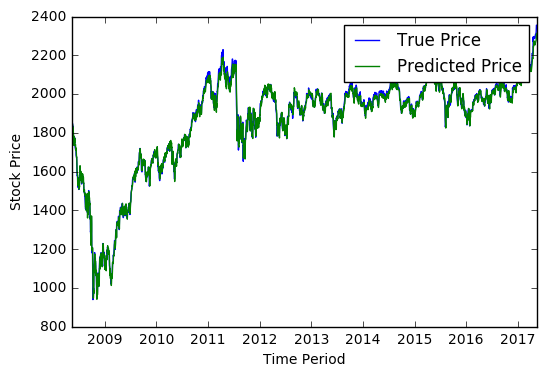

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    mae_val = sess.run(mae, feed_dict={targets: testY, predictions: test_predict})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    mape_val = sess.run(mape, feed_dict={targets: testY, predictions: test_predict})

    print("MAE: {}".format(mae_val))
    print("RMSE: {}".format(rmse_val))
    print("MAPE: {}".format(mape_val))

    new_y = scaler.inverse_transform(testY)
    new_pred_y = scaler.inverse_transform(test_predict)

    mae_val2 = sess.run(mae, feed_dict={targets: new_y, predictions: new_pred_y})
    rmse_val2 = sess.run(rmse, feed_dict={targets: new_y, predictions: new_pred_y})
    mape_val2 = sess.run(mape, feed_dict={targets: new_y, predictions: new_pred_y})

    print("MAE2: {}".format(mae_val2))
    print("RMSE2: {}".format(rmse_val2))
    print("MAPE2: {}".format(mape_val2))
    
    
    
    
    # Plot predictions
    
#     plt.plot(testY) -> 스케일 조정 전 아웃풋
#     plt.plot(test_predict)

    plt.plot(x_index, new_y, label= "True Price")
    plt.plot(x_index, new_pred_y, label= "Predicted Price")    
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()